In [7]:
import sys
sys.path.insert(0, '..')
import os
import glob
import numpy as np
from filament import filament
import datetime
import cmocean
import logging
import calendar
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cfeature
coast_l = cfeature.GSHHSFeature(scale="l")
coast_f = cfeature.GSHHSFeature(scale="f")

datacrs = ccrs.PlateCarree()
plt.style.use("filament.mplstyle")

In [25]:
domain = (-18.5, -13., 26., 31.)
datadir = "/home/ctroupin/data/SST/Global/"

In [26]:
with netCDF4.Dataset(os.path.join(datadir, "sst.day.anom.2024.nc")) as nc:
    lon = nc.get_variables_by_attributes(standard_name = "longitude")[0][:]
    lat = nc.get_variables_by_attributes(standard_name = "latitude")[0][:]
    lon[lon>180] -= 360
    goodlon = np.where( (lon >= domain[0] ) & (lon <= domain[1]))[0]
    goodlat = np.where( (lat >= domain[2] ) & (lat <= domain[3]))[0]
    timevar = nc.get_variables_by_attributes(long_name="Time")[0]
    dates = netCDF4.num2date(timevar[:], timevar.units, only_use_python_datetimes=True)
    SST_anom_noaa = nc.variables["anom"][:,goodlat,goodlon]
    lon = lon[goodlon]
    lat = lat[goodlat]

/home/ctroupin/.virtualenvs/Filament3.11/lib/python3.11/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


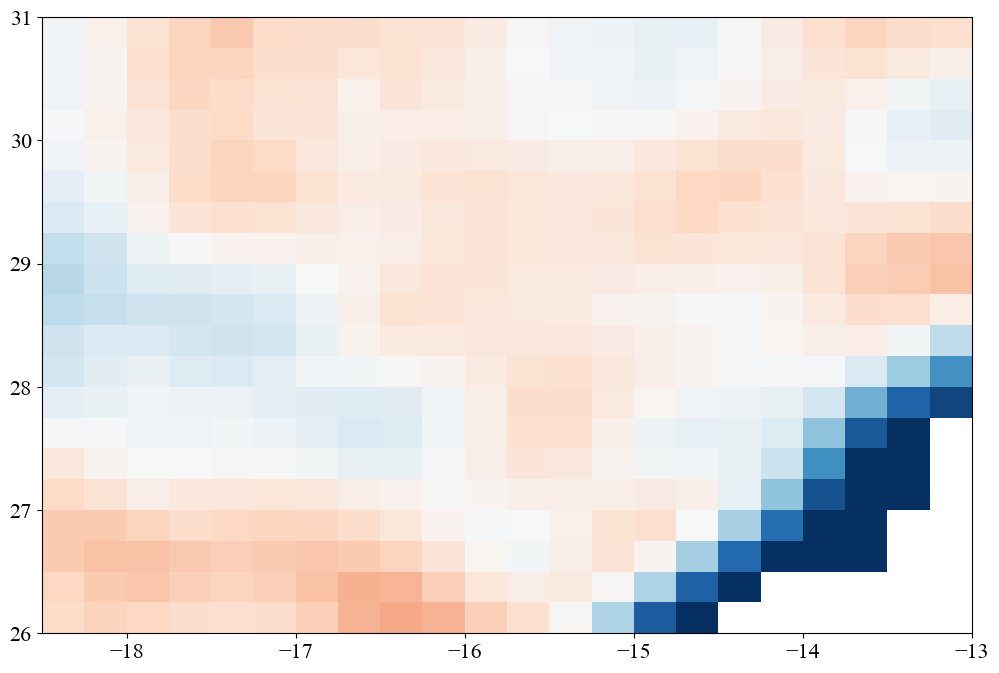

In [29]:
plt.pcolormesh(lon, lat, SST_anom_noaa[-1,:,:], vmin=-2, vmax=2., cmap=plt.cm.RdBu_r)

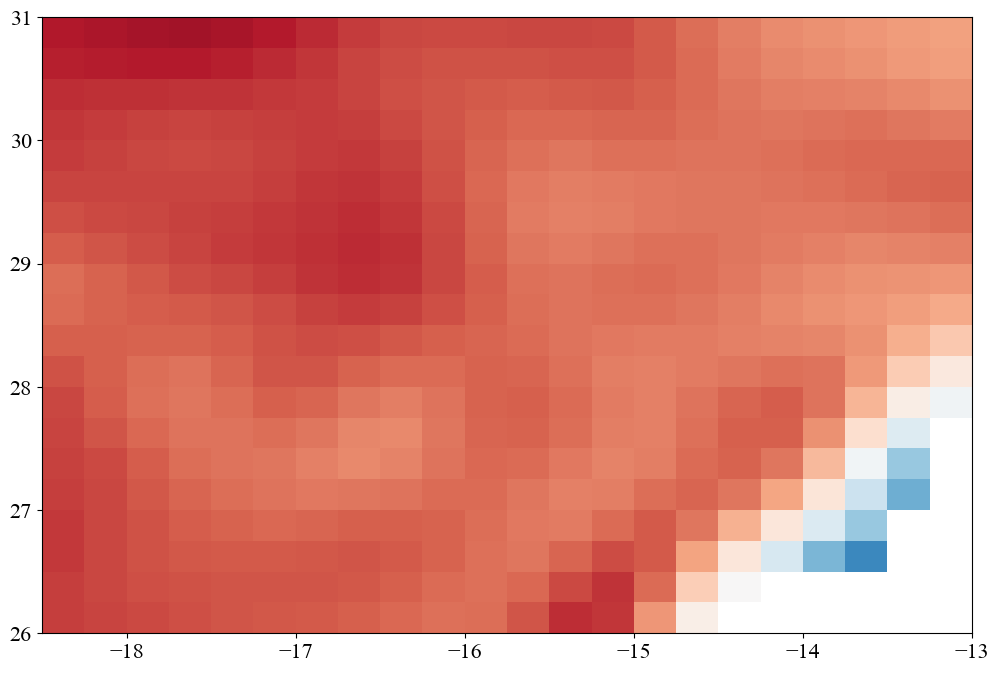

In [40]:
SST_anom_mean_time = []
for ii in range(1, 6):
    gooddates = np.where([dd.month == ii for dd in dates])[0]
    SST_anom_mean = np.mean(SST_anom_noaa[gooddates,:,:], axis=0)
    SST_anom_mean_time.append(SST_anom_noaa[gooddates,:,:].mean())
    plt.pcolormesh(lon, lat, SST_anom_mean, vmin=-2.5, vmax=2.5, cmap=plt.cm.RdBu_r)
    plt.savefig(f"sst_anom_noaa_2024_{ii}")

In [41]:
SST_anom_mean_time

[2.025990656292998,
 2.114148489847197,
 1.55747206920769,
 1.9556168542654029,
 1.3938770232953677]

In [54]:
datafile = "/home/ctroupin/data/EMODnet/TS_TEMP_4798_37e8_4f81.nc"

datafile = "/home/ctroupin/data/EMODnet/TS_TEMP_79f9_0053_5cd2.nc"
with netCDF4.Dataset(datafile) as df:
    timevar = df.get_variables_by_attributes(standard_name="time")[0]
    dates = netCDF4.num2date(timevar[:], timevar.units, 
                             only_use_python_datetimes=True, only_use_cftime_datetimes=False)
    T = df.get_variables_by_attributes(standard_name="sea_water_temperature")[0][:]

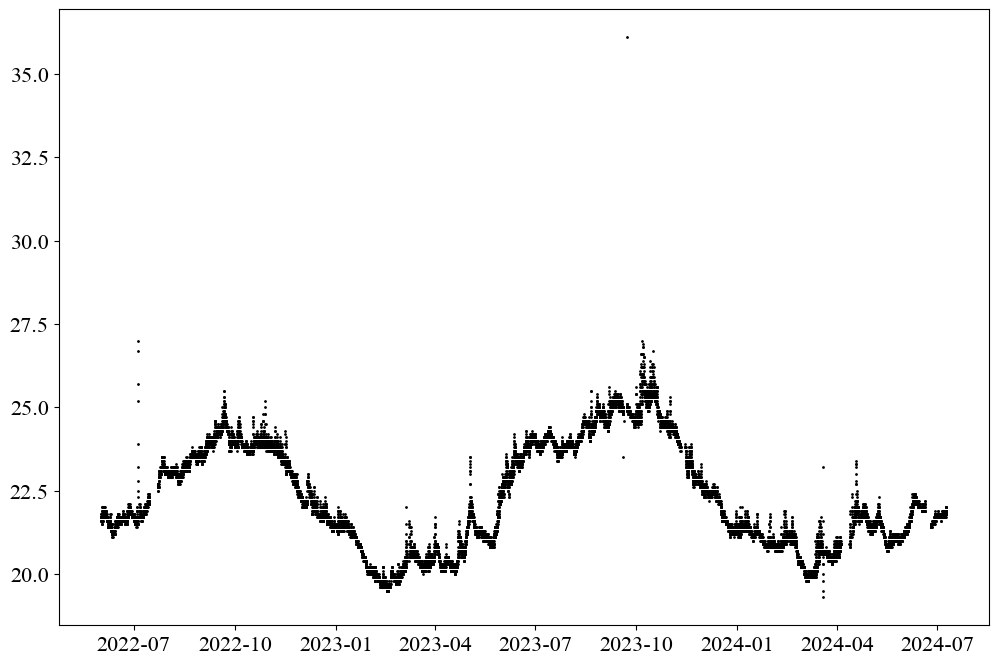

In [55]:
T = np.ma.masked_less(T, 10, copy=True)
plt.plot(dates, T, "ko", ms=1)

In [51]:
 np.ma.masked_less?